# Import the library

In [1]:
import pandas as pd
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
#from textblob import TextBlob

# load the data from google drive

In [2]:
df = pd.read_csv('Data/50k_reviews.csv')

In [3]:
df.head()

,score,text
0,3.0,good and helpfull read this book is very good ...
1,1.0,Sadly overpriced and irrelevant In spite of it...
2,2.0,Endless rant Howard should have borrowed from ...
3,1.0,Not Quite Hip It's really a shame about the ti...
4,5.0,Journey to the Centre of the Earth Hey! This i...


# Data Preprocessing

In the above-given problem statement we have performed various pre-processing steps on the dataset that mainly dealt with removing stopwords, removing emojis. The text document is then converted into the lowercase for better generalization.

Subsequently, the punctuations were cleaned and removed thereby reducing the unnecessary noise from the dataset. After that, we have also removed the repeating characters from the words.

At last, we then performed Stemming(reducing the words to their derived stems) and Lemmatization(reducing the derived words to their root form known as lemma) with limitation of part of speech for better results.

## data cleaning

In [4]:
df.fillna('', inplace=True)

In [5]:
df.isna().sum()

score    0
text     0
dtype: int64

In [6]:
import nltk
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /Users/xin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Making statement text in lower case

In [7]:
df['text']=df['text'].str.lower()
df['text'].head()

0    good and helpfull read this book is very good ...
1    sadly overpriced and irrelevant in spite of it...
2    endless rant howard should have borrowed from ...
3    not quite hip it's really a shame about the ti...
4    journey to the centre of the earth hey! this i...
Name: text, dtype: object

### Restore common acronyms

In [8]:
def restore_common_abbr(caption):
    pat_is = re.compile("(it|he|she|that|this|there|here)(\'s)", re.I)
    pat_s = re.compile("(?<=[a-zA-Z])\'s")  
    pat_s2 = re.compile("(?<=s)\'s?")
    pat_not = re.compile("(?<=[a-zA-Z])n\'t")  # not abbreviation
    pat_would = re.compile("(?<=[a-zA-Z])\'d")  # would abbreviation
    pat_will = re.compile("(?<=[a-zA-Z])\'ll")  # will abbreviation
    pat_am = re.compile("(?<=[I|i])\'m")  # am abbreviation
    pat_are = re.compile("(?<=[a-zA-Z])\'re")  # are abbreviation
    pat_ve = re.compile("(?<=[a-zA-Z])\'ve")  # have abbreviation

    new_text = caption
    new_text = pat_is.sub(r"\1 is", new_text)
    new_text = pat_s.sub("", new_text)
    new_text = pat_s2.sub("", new_text)
    new_text = pat_not.sub(" not", new_text)
    new_text = pat_would.sub(" would", new_text)
    new_text = pat_will.sub(" will", new_text)
    new_text = pat_am.sub(" am", new_text)
    new_text = pat_are.sub(" are", new_text)
    new_text = pat_ve.sub(" have", new_text)
    new_text = new_text.replace('\'', ' ')
    return new_text

In [9]:
df['text']= df['text'].apply(lambda x: restore_common_abbr(x))
df['text'].head()

0    good and helpfull read this book is very good ...
1    sadly overpriced and irrelevant in spite of it...
2    endless rant howard should have borrowed from ...
3    not quite hip it is really a shame about the t...
4    journey to the centre of the earth hey! this i...
Name: text, dtype: object

### Cleaning and removing the above stop words list from the text

In [10]:
STOPWORDS = set(stopwords.words('english'))
print(STOPWORDS)

{"you're", 'had', "isn't", 'does', 'by', 'those', 'wasn', 'haven', 'some', 'yourselves', 'won', 'being', 'their', 'll', 'o', 'were', 'than', "needn't", 'while', 'whom', 'at', "mustn't", 'the', "wouldn't", 'shouldn', 'couldn', 'and', 'when', 'm', "couldn't", 'a', 'out', "won't", 'again', "that'll", 'through', 'under', 'having', 'if', 'hers', 'above', 'i', 'here', 'until', "should've", 'didn', 'between', "you'll", "it's", 'weren', 'me', 'shan', 'to', "shouldn't", 'its', "weren't", 'they', 'any', 'ourselves', 'our', 'doesn', 'how', 'in', 'my', 'who', 'both', 'into', "haven't", 'which', "didn't", 'himself', 'd', 'an', 'but', 'doing', 'before', 'y', 'below', 'theirs', 'off', 'mustn', 'be', 'nor', 'did', 'as', 've', 'herself', 'over', 'isn', 'down', 'for', 'after', 'he', 'mightn', 'needn', 'from', 't', 'such', "mightn't", 'where', 'aren', 'yourself', 'of', 'then', 'no', 'there', "doesn't", 'own', 'ma', 'against', 'them', 'because', 'should', 'myself', 'with', 'about', 'we', 'during', 'you', 

In [11]:
#create our new stopoing words to keep some words like 'not'  
my_stopwords ={'have', 'my', 'so', 're', 'any', 'only', 'haven', 'between', 'be', 'am', "hadn't", 'its', 've', 'needn', 'you', 'doing', "don't", 'she', 'all', 'against', 'me', 'were', 'y', 'theirs', 'hadn', 'myself', 'should', "didn't", 'our', 'themselves', "should've", "you'd", 'where', 'a', 'hers', 'here', 'are', 'didn', 'below', 'is', 'this', 'ma', "that'll", "mustn't", 'weren', 'wouldn', 'their', 'ours', 'don', 'other', 'same', "won't", 'more', 'how', "isn't", 'few', 'than', 'too', 'in', 'if', 'yours', 'ain', 'yourself', "wouldn't", 'those', "she's", 'until', 'i', 'itself', 'has', 'shouldn', 'your', 'own', 'under', 'further', 'again', 'm', 'but', 'won', 'over', 'no', 'mustn', 'that', 'while', 'during', 'to', 'above', 'such', 'will', 'shan', "wasn't", 'him', 'them', 'was', 'he', 'yourselves', 'there', 'herself', 'for', "doesn't", "couldn't", 'doesn', 'did', 'hasn', 'with', 'some', 'into', 'does', 'nor', 'o', "needn't", 'and', 'most', 'his', 'having', 'after', "you've", 'the', 'they', 'then', 'isn', "shan't", 'once', 't', 'it', "shouldn't", 'been', 'can', 'being', 'of', 'about', 'just', 'down', "hasn't", 'now', 'ourselves', 'd', 'up', 'her', 'had', 'aren', 'what', 'from', "you'll", 'each', 'we', 'whom', "mightn't", 'do', 'because', 'through', 's', "weren't", 'himself', 'who', 'both', 'an', 'by', 'when', 'at', 'as', 'off', 'very', 'these', 'or', "it's", 'mightn', 'before', "you're", "haven't", 'on', 'why', 'll', 'which', 'wasn', "aren't", 'couldn', 'out'}

In [12]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in my_stopwords])
df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))
df['text'].head()

0    good helpfull read book good type thats findin...
1    sadly overpriced irrelevant spite claim "illus...
2    endless rant howard borrowed dennis miller sta...
3    not quite hip really shame time reserch went t...
4    journey centre earth hey! great book! absolute...
Name: text, dtype: object

### Cleaning and removing punctuations

In [13]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['text']= df['text'].apply(lambda x: cleaning_punctuations(x))
df['text'].head()

0    good helpfull read book good type thats findin...
1    sadly overpriced irrelevant spite claim illust...
2    endless rant howard borrowed dennis miller sta...
3    not quite hip really shame time reserch went t...
4    journey centre earth hey great book absolutely...
Name: text, dtype: object

### Cleaning and removing repeating characters

In [14]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df['text'] = df['text'].apply(lambda x: cleaning_repeating_char(x))
df['text'].head()

0    good helpfull read book good type thats findin...
1    sadly overpriced irrelevant spite claim illust...
2    endless rant howard borrowed dennis miller sta...
3    not quite hip really shame time reserch went t...
4    journey centre earth hey great book absolutely...
Name: text, dtype: object

### Cleaning and removing Numeric numbers

In [15]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', ' ', data)
df['text'] = df['text'].apply(lambda x: cleaning_numbers(x))
df['text'].head()

0    good helpfull read book good type thats findin...
1    sadly overpriced irrelevant spite claim illust...
2    endless rant howard borrowed dennis miller sta...
3    not quite hip really shame time reserch went t...
4    journey centre earth hey great book absolutely...
Name: text, dtype: object

### Remove short words

We remove those words which are of little or no use. So, we will select the length of words which we want to remove

In [16]:
def transform_text(text):
    return ' '.join([word for word in text.split() if len(word) > 2])
df['text'] = df['text'].apply(lambda x: transform_text(x))
df['text'].head() 

0    good helpfull read book good type thats findin...
1    sadly overpriced irrelevant spite claim illust...
2    endless rant howard borrowed dennis miller sta...
3    not quite hip really shame time reserch went t...
4    journey centre earth hey great book absolutely...
Name: text, dtype: object

## Tokenization

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/xin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
from nltk import word_tokenize
df['text']=df['text'].apply(lambda x: word_tokenize(x))

In [19]:
df['text'].head()

0    [good, helpfull, read, book, good, type, thats...
1    [sadly, overpriced, irrelevant, spite, claim, ...
2    [endless, rant, howard, borrowed, dennis, mill...
3    [not, quite, hip, really, shame, time, reserch...
4    [journey, centre, earth, hey, great, book, abs...
Name: text, dtype: object

In [20]:
df

,score,text
0,3.0,"[good, helpfull, read, book, good, type, thats..."
1,1.0,"[sadly, overpriced, irrelevant, spite, claim, ..."
2,2.0,"[endless, rant, howard, borrowed, dennis, mill..."
3,1.0,"[not, quite, hip, really, shame, time, reserch..."
4,5.0,"[journey, centre, earth, hey, great, book, abs..."
...,...,...
49995,5.0,"[stars, short, easy, explanation, followed, lo..."
49996,5.0,"[michael, hague, illustrations, best, buy, lov..."
49997,5.0,"[quotamerican, beautyquot, novels, dark, comed..."
49998,4.0,"[funny, quirky, really, funny, witty, book, su..."


### Applying Lemmatizer

In [21]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/xin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /Users/xin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [23]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/xin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [24]:
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# get the part of speech
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def tag_lem(doc,lemmatizer):
    if doc[-1] != '.':
        doc.append('.')
    tagged_sent = pos_tag(doc)  # get the part of speech

    new_s = []
    for c in tagged_sent:
        if c[0].isdigit():
            new_s.append("#number")
        elif c[0] not in string.punctuation:
            wordnet_pos = get_wordnet_pos(c[1]) or wordnet.NOUN
            new_s.append(lemmatizer.lemmatize(c[0], pos=wordnet_pos))  
    return new_s

lemmatizer = WordNetLemmatizer()

df['text'] = df['text'].apply(lambda x: tag_lem(x,lemmatizer))
df['text'].head()

0    [good, helpfull, read, book, good, type, thats...
1    [sadly, overprice, irrelevant, spite, claim, i...
2    [endless, rant, howard, borrow, dennis, miller...
3    [not, quite, hip, really, shame, time, reserch...
4    [journey, centre, earth, hey, great, book, abs...
Name: text, dtype: object

In [25]:
tag_lem(['borrowed','cats','facing'],lemmatizer)

['borrow', 'cat', 'face']

In [26]:
df

,score,text
0,3.0,"[good, helpfull, read, book, good, type, thats..."
1,1.0,"[sadly, overprice, irrelevant, spite, claim, i..."
2,2.0,"[endless, rant, howard, borrow, dennis, miller..."
3,1.0,"[not, quite, hip, really, shame, time, reserch..."
4,5.0,"[journey, centre, earth, hey, great, book, abs..."
...,...,...
49995,5.0,"[star, short, easy, explanation, follow, lot, ..."
49996,5.0,"[michael, hague, illustration, best, buy, love..."
49997,5.0,"[quotamerican, beautyquot, novel, dark, comedy..."
49998,4.0,"[funny, quirky, really, funny, witty, book, su..."


In [28]:
df.to_pickle('Data/data_cleaned')  #use pickle to avoid quotation marks add to tokens

In [28]:
df.to_csv("Data/data_cleaned.csv", encoding='utf-8', index=False)

In [68]:
from gensim.models import Word2Vec
import joblib
import pickle
import time
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [53]:
def split_train_test(df, test_size=0.2, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(df['text'], 
                                                        df['score'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=15)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

In [54]:
X_train, X_test, Y_train, Y_test = split_train_test(df)

Value counts for Train sentiments
5.0    24226
4.0     7728
3.0     3422
1.0     2638
2.0     1986
Name: score, dtype: int64
Value counts for Test sentiments
5.0    6042
4.0    1963
3.0     854
1.0     639
2.0     502
Name: score, dtype: int64
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
   index                                               text
0  45570  [multidimensional, thought, book, good, job, p...
1  21855  [magnetic, influence, success, business, find,...
2  41127  [read, weep, world, full, bad, book, write, am...
3   4849  [clear, channel, watt, book, great, show, book...
4  20742  [page, miss, line, mass, market, paperback, ed...


In [57]:
X_train.to_csv('Data/X_train')
X_test.to_csv('Data/X_test')
Y_train.to_csv('Data/y_train')
Y_test.to_csv('Data/y_test')


In [58]:
X_train

,index,text
0,45570,"[multidimensional, thought, book, good, job, p..."
1,21855,"[magnetic, influence, success, business, find,..."
2,41127,"[read, weep, world, full, bad, book, write, am..."
3,4849,"[clear, channel, watt, book, great, show, book..."
4,20742,"[page, miss, line, mass, market, paperback, ed..."
...,...,...
39995,39296,"[euphoric, sandra, cisneros, not, writershe, m..."
39996,49015,"[keep, get, well, start, first, leave, behind,..."
39997,2693,"[new, age, twaddle, here, good, book, not, sur..."
39998,8076,"[enlighten, new, biography, read, everything, ..."


In [60]:
vector_size=1000
#The number of dimensions of embeddings, the default is 100
window=3
#The maximum distance between a target word and its neighbours, default is 5
min_count=3
#The minimum counts of words in order for the word to be considered for the training of model, default is 5
workers=3
#The number of partitions during training, default is 3
sg=1
#The training algorithom, either CBOW(0) or skip gram(1), default is CBOW

#tokens = pd.Series(df['tokenized_text']).values
start_t = time.time()
w2vmodel=Word2Vec(X_train['text'],min_count=min_count,vector_size=vector_size,workers=workers,sg=sg)
print('Time taken to train word2vec model:' +str(time.time()-start_t))

Time taken to train word2vec model:133.9899299144745


In [61]:
filename='w2v_model.joblib'
joblib.dump(w2vmodel,filename)
#save model into a file

['w2v_model.joblib']

In [93]:
word2vec_model_file = 'C:/Users/nd19620/OneDrive - University of Bristol/DST/DST_Assessment2/Xin/Data/' + 'word2vec_' + '.model'
w2vmodel.save(word2vec_model_file)

In [94]:
w2v_model = Word2Vec.load(word2vec_model_file)

In [95]:
w2v_model.wv.key_to_index

{'book': 0,
 'not': 1,
 'read': 2,
 'one': 3,
 'story': 4,
 'like': 5,
 'would': 6,
 'time': 7,
 'great': 8,
 'make': 9,
 'good': 10,
 'get': 11,
 'write': 12,
 'character': 13,
 'find': 14,
 'love': 15,
 'life': 16,
 'well': 17,
 'think': 18,
 'novel': 19,
 'first': 20,
 'many': 21,
 'know': 22,
 'much': 23,
 'work': 24,
 'people': 25,
 'take': 26,
 'way': 27,
 'also': 28,
 'give': 29,
 'even': 30,
 'really': 31,
 'could': 32,
 'year': 33,
 'say': 34,
 'author': 35,
 'want': 36,
 'see': 37,
 'world': 38,
 'end': 39,
 'reader': 40,
 'come': 41,
 'best': 42,
 'use': 43,
 'thing': 44,
 'go': 45,
 'new': 46,
 'look': 47,
 'little': 48,
 'never': 49,
 'page': 50,
 'seem': 51,
 'two': 52,
 'recommend': 53,
 'man': 54,
 'enjoy': 55,
 'tell': 56,
 'still': 57,
 'ever': 58,
 'child': 59,
 'part': 60,
 'feel': 61,
 'live': 62,
 'old': 63,
 'start': 64,
 'need': 65,
 'series': 66,
 'woman': 67,
 'every': 68,
 'try': 69,
 'put': 70,
 'must': 71,
 'back': 72,
 'help': 73,
 'history': 74,
 'day': 7

In [96]:
emb_df = (
    pd.DataFrame(
        [w2v_model.wv.get_vector(str(n)) for n in w2vmodel.wv.key_to_index],
        index = w2vmodel.wv.key_to_index
    )
)
print(emb_df.shape)

emb_df.head()

(36625, 1000)


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
book,0.049041,0.054666,0.061427,0.121045,-0.045339,-0.118461,0.100613,0.059432,0.083792,-0.031879,...,-0.027546,0.041310,0.075790,0.166398,0.255560,0.031561,-0.018271,-0.109509,0.114877,0.050137
not,0.068621,-0.055256,0.059642,-0.017959,-0.055700,-0.101768,0.062927,0.058558,0.028140,-0.052456,...,-0.029597,-0.032450,0.104090,0.069625,0.032077,-0.002408,-0.101849,-0.010342,0.045000,0.038051
read,-0.013308,0.068600,0.059399,0.076949,-0.028962,-0.194722,0.075539,-0.001651,-0.087039,0.014731,...,-0.017233,0.067398,0.022781,0.138282,0.055146,-0.027392,0.026410,-0.121115,-0.074606,0.084671
one,0.031703,0.003572,-0.048014,0.047451,-0.096343,-0.123018,0.047975,0.179860,0.037701,0.000395,...,0.028278,0.079140,0.030239,0.111247,0.019215,-0.022711,-0.050128,-0.008646,0.082511,0.076279
story,-0.007644,0.149018,-0.048417,0.060688,0.023553,-0.034289,0.120958,0.034901,0.149946,-0.033021,...,0.050176,-0.055329,0.006887,-0.074366,0.247778,0.047666,-0.121899,0.082631,0.017340,-0.191397


In [97]:
print(w2v_model.wv.most_similar('wonderful'))

[('wonderfull', 0.7148428559303284), ('fantastic', 0.7134851217269897), ('fabulous', 0.680257260799408), ('marvelous', 0.6657639741897583), ('splendid', 0.6602292656898499), ('colourful', 0.6588442921638489), ('inspiring', 0.6528670191764832), ('excellant', 0.652252197265625), ('terrific', 0.6510467529296875), ('delightful', 0.6493553519248962)]


In [98]:
print("Cosine similarity between 'wonderful' " +
               "terrible' - Skip Gram : ",
    w2v_model.wv.similarity('wonderful', 'bad'))

Cosine similarity between 'wonderful' terrible' - Skip Gram :  0.25160104


https://www.kaggle.com/code/varun08/sentiment-analysis-using-word2vec/notebook

In [114]:
# Function to average all word vectors in a paragraph
def featureVecMethod(words, model, num_features):
    # Pre-initialising empty numpy array for speed
    featureVec = np.zeros(num_features,dtype="float32")
    nwords = 0
    
    #Converting Index2Word which is a list to a set for better speed in the execution.
    index2word_set = set(model.wv.index_to_key)
    
    for word in  words:
        if word in index2word_set:
            nwords = nwords + 1
            featureVec = np.add(featureVec,model.wv[word])
    
    # Dividing the result by number of words to get average
    featureVec = np.divide(featureVec, nwords)
    return featureVec

In [122]:
# Function for calculating the average feature vector
def getAvgFeatureVecs(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        # Printing a status message every 1000th review
        if counter%1000 == 0:
            print("Comment %d of %d"%(counter,len(reviews)))
            
        reviewFeatureVecs[counter] = featureVecMethod(review, model, num_features)
        counter = counter+1
        
    return reviewFeatureVecs

In [123]:
trainDataVecs = getAvgFeatureVecs(X_train['text'], w2v_model, 1000)

Comment 0 of 40000
Comment 1000 of 40000
Comment 2000 of 40000
Comment 3000 of 40000
Comment 4000 of 40000
Comment 5000 of 40000
Comment 6000 of 40000
Comment 7000 of 40000
Comment 8000 of 40000
Comment 9000 of 40000
Comment 10000 of 40000
Comment 11000 of 40000
Comment 12000 of 40000


C:\Users\nd19620\AppData\Local\Temp\ipykernel_15196\2906937871.py:16: RuntimeWarning: invalid value encountered in true_divide
  featureVec = np.divide(featureVec, nwords)


Comment 13000 of 40000
Comment 14000 of 40000
Comment 15000 of 40000
Comment 16000 of 40000
Comment 17000 of 40000
Comment 18000 of 40000
Comment 19000 of 40000
Comment 20000 of 40000
Comment 21000 of 40000
Comment 22000 of 40000
Comment 23000 of 40000
Comment 24000 of 40000
Comment 25000 of 40000
Comment 26000 of 40000
Comment 27000 of 40000
Comment 28000 of 40000
Comment 29000 of 40000
Comment 30000 of 40000
Comment 31000 of 40000
Comment 32000 of 40000
Comment 33000 of 40000
Comment 34000 of 40000
Comment 35000 of 40000
Comment 36000 of 40000
Comment 37000 of 40000
Comment 38000 of 40000
Comment 39000 of 40000


In [29]:
trainDataVecs[1]

NameError: name 'trainDataVecs' is not defined

In [124]:
trainDataVecs.shape

(40000, 1000)

In [138]:
import numpy as np
np.count_nonzero(np.isnan(trainDataVecs))

1000

In [127]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100)


start_time = time.time()
# Fit the model
forest = forest.fit(trainDataVecs, Y_train["score"])
print("Time taken to fit the model with word2vec vectors: " + str(time.time() - start_time))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [126]:
word2vec_filename = 'C:/Users/nd19620/OneDrive - University of Bristol/DST/DST_Assessment2/Xin/Data/' + 'train_review_word2vec.csv'

with open(word2vec_filename,'w+') as word2vec_file:
    for index, row in X_train.iterrows():
        model_vector = (np.mean([w2v_model.wv[token] for token in row['text']], axis=0)).tolist()
        if index == 0:
            header = ",".join(str(ele) for ele in range(1000))
            word2vec_file.write(header)
            word2vec_file.write("\n")
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(1000)])
        word2vec_file.write(line1)
        word2vec_file.write('\n')

KeyError: "Key 'lifenot' not present"

In [71]:
clf_decision_word2vec = DecisionTreeClassifier()

start_time = time.time()
# Fit the model
clf_decision_word2vec.fit(emb_df, Y_train['score'])
print("Time taken to fit the model with word2vec vectors: " + str(time.time() - start_time))

ValueError: Number of labels=40000 does not match number of samples=36625

# Doc2Vec

In [44]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df['text'])]
print(documents[1])

TaggedDocument(['sadly', 'overprice', 'irrelevant', 'spite', 'claim', 'illustrate', 'pmo', 'effective', 'reducing', 'cost', 'project', 'decrease', 'time', 'market', 'new', 'product', 'increase', 'corporate', 'profit', 'ensure', 'project', 'success', 'small', 'overprice', 'book', 'actually', 'none', 'thingsa', 'collection', 'unrelated', 'article', 'write', 'dry', 'overly', 'academic', 'style', 'book', 'totally', 'fail', 'address', 'proposition', 'project', 'management', 'office', 'pmo', 'add', 'value', 'organization', 'many', 'statement', 'effect', 'the', 'pmo', 'perform', 'function', 'assertion', 'function', 'itself', 'whether', 'easily', 'perform', 'organization', 'not', 'formal', 'pmoit', 'surprise', 'half', 'eight', 'chapter', 'relationship', 'pmo', 'function', 'all', 'discuss', 'various', 'project', 'management', 'issue', 'interest', 'well', 'cover', 'elsewhere', 'literature', 'topic', 'not', 'one', 'expect', 'purchase', 'book', 'purportedly', 'discuss', 'pmo', 'functionthe', 'book

In [47]:
start_t = time.time()
doc2vec_model = Doc2Vec(documents, vector_size=1000, window=3, min_count=1, workers=4)
print('Time taken to train word2vec model:' +str(time.time()-start_t))

Time taken to train word2vec model:100.07591652870178


In [48]:
filename='d2v_model.joblib'
joblib.dump(doc2vec_model,filename)

['d2v_model.joblib']

In [49]:
vector = doc2vec_model.infer_vector(df['text'][0])
print(len(vector))
print("Top 10 values in Doc2Vec inferred vector:")
print(vector[:10])

1000
Top 10 values in Doc2Vec inferred vector:
[ 0.06015526 -0.01836609  0.04403772 -0.05998364 -0.08297021  0.01155065
 -0.01434773  0.06273506  0.05989499 -0.0201901 ]


## visualization

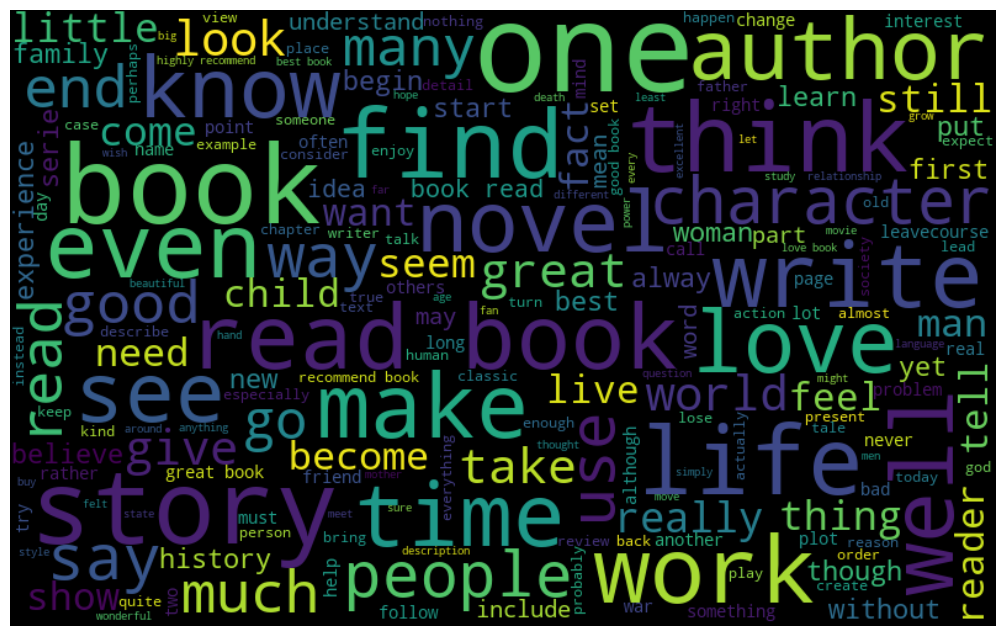

In [28]:
df['combine']=df['text'].apply(lambda x: ' '.join(x))
all_words = " ".join(sent for sent in df['combine'])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
words = all_words.split()
counts = {}  
for word in words:
    counts[word] = counts.get(word, 0) + 1 
items = list(counts.items())
items.sort(key=lambda x: x[1], reverse=True)
for i in range(30):
    word, count = items[i] 
    print ("{0:<10}{1:>5}".format(word, count))



book      113091
not       72980
read      50968
one       32479
story     25187
like      21686
would     20633
time      20164
great     20014
make      19779
good      18890
write     18052
get       18040
find      16466
character 16459
love      16357
life      15273
well      15208
think     14710
novel     13835
first     13097
many      13004
much      12239
know      12226
work      12009
people    11784
take      11658
also      11610
way       11574
give      11409
